In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Input, Dense
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = X_train.reshape((X_train.shape[0], 28*28))
X_test = X_test.reshape(((X_test.shape[0], 28*28)))

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [4]:
input_size = 784
hidden_size = 64
code_size = 32

In [5]:
# Defining the AutoEncoder layers
input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

In [6]:
autoencoder = tf.keras.Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 9s 3ms/step - loss: 0.1564
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1104
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1020
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0977
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0950
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0934
Epoch 7/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0920
Epoch 8/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0907
Epoch 9/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0899
Epoch 10/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0893
Epoch 11/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0888
Epoch 12/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0885
E

313/313 [==============================] - 1s 2ms/step


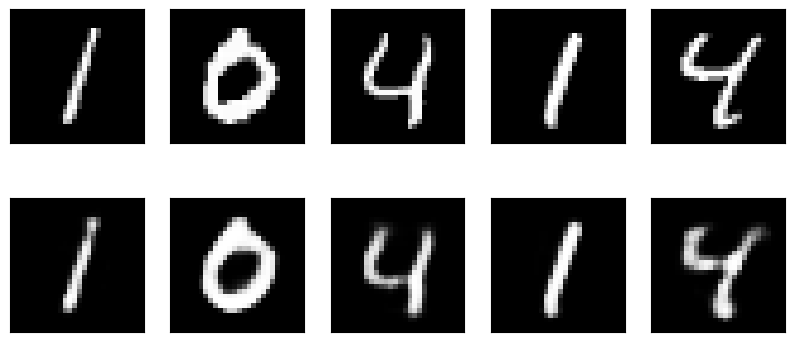

In [7]:
decoded_imgs = autoencoder.predict(X_test)
# number fo digits to show
n = 5
plt.figure(figsize=(10, 4.5))
for i in range(n):
        # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i+2].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot reconstruction 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i+2].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Reconstructed Images')
plt.show()